In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
delivery = pd.read_csv('deliveries.csv')
pd.set_option('display.max_columns', None)

In [4]:
deliveries=delivery

In [5]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


Let's see some of the Batsman Metrics :

I. Hard-hitting Ability: How many fours and sizes does a batsman score? The below given equation is used.

Hard-hitting Ability = (Fours + Sixes) / Number of balls played by batsman

How many fours and sixes has a batsman hit in his IPL career divided by the number of ball he played? This calculates the hard-hitting ability of a batsman.

II. Finishing Ability: Number of not out innings divided by the total innings played by the player.

Finishing Ability = Not out innings / Total innings played.

III. Consistency of Player: Total Run scored / Number Of times out.

IV. Running between the wickets: (Total run – (Fours + Sixes)) / (total numbers of balls played – boundary balls).

In [7]:
deliveries.drop(deliveries[deliveries['is_super_over'] != 0].index, inplace=True) 

In [8]:
deliveries.drop(deliveries[deliveries['wide_runs'] != 0].index, inplace=True) 

In [9]:
deliveries.drop(deliveries[deliveries['noball_runs'] != 0].index, inplace=True) 

In [10]:
len(deliveries)

172884

# innings played by batsman

In [11]:
innings_played=deliveries.groupby(['batsman'])['match_id'].nunique().reset_index()

In [12]:
innings_played.rename(columns = {'match_id':'total_innings'}, inplace = True)

In [13]:
innings_played=innings_played[innings_played['total_innings']>20]

In [14]:
innings_played=innings_played.reset_index(drop=True)

In [15]:
innings_played

,batsman,total_innings
0,A Ashish Reddy,23
1,A Mishra,54
2,A Symonds,36
3,AB de Villiers,142
4,AC Gilchrist,80
...,...,...
139,WP Saha,93
140,Y Venugopal Rao,52
141,YK Pathan,153
142,Yuvraj Singh,126


# Hard-hitting Ability

In [16]:
balls_played=deliveries['batsman'].value_counts().reset_index()

In [17]:
balls_played.rename(columns = {'index':'batsman', 'batsman':'balls_played'}, inplace = True)

In [18]:
final = pd.merge(balls_played,innings_played,on=['batsman'])

In [19]:
final

,batsman,balls_played,total_innings
0,V Kohli,4098,169
1,SK Raina,3895,189
2,RG Sharma,3731,182
3,S Dhawan,3659,158
4,G Gambhir,3394,151
...,...,...,...
139,Z Khan,140,27
140,UT Yadav,126,33
141,MM Sharma,117,25
142,RJ Harris,111,21


### Number of 4 and 6

In [20]:
num_4=deliveries[deliveries['batsman_runs']==4] 

In [21]:
num_4=num_4['batsman'].value_counts().reset_index()

In [22]:
num_4.rename(columns={'index':'batsman','batsman':'num_4'},inplace=True)

In [23]:
num_4.head(20)

,batsman,num_4
0,S Dhawan,523
1,SK Raina,493
2,G Gambhir,490
3,V Kohli,481
4,DA Warner,457
5,RV Uthappa,435
6,RG Sharma,428
7,AM Rahane,405
8,CH Gayle,372
9,PA Patel,365


In [24]:
num_6=deliveries[deliveries['batsman_runs']==6] 

In [25]:
num_6=num_6['batsman'].value_counts().reset_index()

In [26]:
num_6.rename(columns={'index':'batsman','batsman':'num_6'},inplace=True)

In [27]:
total_num=num_4.merge(num_6, on='batsman', how='left')

In [28]:
total_num['num_6'] = total_num['num_6'].replace(np.nan, 0)

In [29]:
total_num['num_6'] = total_num['num_6'].astype(int)

In [30]:
total_num = total_num.eval('num_4_6 = num_4 + num_6')

In [31]:
total=total_num[['batsman','num_4_6']]

In [32]:
final = pd.merge(total,final,on=['batsman'])

In [33]:
final['hard_hitter']=final['num_4_6']/final['balls_played']

In [34]:
final_hard = final.sort_values(by='hard_hitter',ascending=False)

In [35]:
final_hard.reset_index(drop=True)

,batsman,num_4_6,balls_played,total_innings,hard_hitter
0,SP Narine,138,457,54,0.301969
1,AD Russell,217,750,52,0.289333
2,V Sehwag,438,1740,104,0.251724
3,CH Gayle,693,2955,124,0.234518
4,RR Pant,248,1068,54,0.232210
...,...,...,...,...,...
139,Z Khan,13,140,27,0.092857
140,A Mishra,35,387,54,0.090439
141,RJ Harris,9,111,21,0.081081
142,GH Vihari,24,311,21,0.077170


In [36]:
final_hard

,batsman,num_4_6,balls_played,total_innings,hard_hitter
62,SP Narine,138,457,54,0.301969
60,AD Russell,217,750,52,0.289333
13,V Sehwag,438,1740,104,0.251724
8,CH Gayle,693,2955,124,0.234518
40,RR Pant,248,1068,54,0.232210
...,...,...,...,...,...
138,Z Khan,13,140,27,0.092857
117,A Mishra,35,387,54,0.090439
142,RJ Harris,9,111,21,0.081081
126,GH Vihari,24,311,21,0.077170


In [37]:
final_hard=final_hard.head(10)

In [38]:
final_hard.index = np.arange(1, len(final_hard) + 1)

In [39]:
final_hard=final_hard[['batsman','hard_hitter']]

In [40]:
final_hard

,batsman,hard_hitter
1,SP Narine,0.301969
2,AD Russell,0.289333
3,V Sehwag,0.251724
4,CH Gayle,0.234518
5,RR Pant,0.232210
6,GJ Maxwell,0.231750
7,ST Jayasuriya,0.230624
8,JC Buttler,0.222222
9,AC Gilchrist,0.219825
10,P Shaw,0.217494


# Finishing Ability

## not out innings

In [41]:
deliveries=deliveries.replace(np.nan,0)

In [42]:
not_out_players=deliveries

In [43]:
not_out_players=not_out_players[['match_id','batsman','player_dismissed','total_runs']]

In [44]:
player_runs=not_out_players.groupby('batsman')['total_runs'].sum()

In [45]:
player_runs=player_runs.reset_index()

In [46]:
player_runs

,batsman,total_runs
0,A Ashish Reddy,285
1,A Chandila,4
2,A Chopra,54
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
511,YV Takawale,200
512,Yashpal Singh,47
513,Younis Khan,3
514,Yuvraj Singh,2770


In [47]:
match_ids = not_out_players['match_id'].unique() # Get unique match_ids

In [48]:
len(match_ids)

756

In [49]:
for match_id in match_ids:
#     # Get the list of batsmen who were dismissed in the current match_id
     dismissed_batsmen = not_out_players[not_out_players['match_id'] == match_id]['player_dismissed'].unique().tolist()
    
#     # Remove dismissed batsmen from the 'batsman' column for the current match_id
     not_out_players.loc[(not_out_players['match_id'] == match_id) & (not_out_players['batsman'].isin(dismissed_batsmen)), 'batsman'] = ''

In [50]:
not_out_players.drop(not_out_players[not_out_players['batsman'] == ''].index, inplace=True) 

/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_17906/525228873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_out_players.drop(not_out_players[not_out_players['batsman'] == ''].index, inplace=True)


In [51]:
not_out_players.drop(not_out_players[not_out_players['player_dismissed'] != 0].index, inplace=True) 

/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_17906/2434915877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_out_players.drop(not_out_players[not_out_players['player_dismissed'] != 0].index, inplace=True)


In [52]:
not_out_players=not_out_players.reset_index()

In [53]:
not_out_players

,index,match_id,batsman,player_dismissed,total_runs
0,96,1,DJ Hooda,0,1
1,98,1,DJ Hooda,0,1
2,99,1,DJ Hooda,0,1
3,103,1,DJ Hooda,0,0
4,104,1,DJ Hooda,0,1
...,...,...,...,...,...
39561,179068,11415,RA Jadeja,0,2
39562,179069,11415,RA Jadeja,0,0
39563,179070,11415,RA Jadeja,0,2
39564,179071,11415,RA Jadeja,0,8


In [54]:
not_out_players = not_out_players.groupby('batsman')['match_id'].nunique()

In [55]:
not_out_players=not_out_players.reset_index()

In [56]:
not_out_players.rename(columns = {'match_id':'not_out_innings'}, inplace = True)

In [57]:
not_out_players = pd.merge(player_runs,not_out_players,on=['batsman'])

In [58]:
not_out_players[not_out_players['batsman']== 'V Kohli']

,batsman,total_runs,not_out_innings
370,V Kohli,5456,26


In [59]:
final = pd.merge(not_out_players,final,on=['batsman'])

In [60]:
final['finishing_ability']=final['not_out_innings']/final['total_innings']

In [61]:
final_ability = final.sort_values(by='finishing_ability',ascending=False)

In [62]:
final_ability=final_ability.reset_index(drop=True)

In [63]:
final_ability.index = np.arange(1, len(final_ability) + 1)

In [64]:
#final_ability.drop(final_ability[final_ability['runs'] < final_ability['total_innings']*15].index, inplace=True) 

In [65]:
final_ability_1=final_ability[final_ability['total_runs'] > final_ability['total_innings']*17]

In [66]:
final_ability_1=final_ability_1.reset_index(drop=True)

In [67]:
final_ability_1=final_ability_1.head(10)

In [68]:
final_ability_1.index = np.arange(1, len(final_ability_1) + 1)

In [69]:
final_ability_1 = final_ability_1[['batsman', 'finishing_ability']]


In [70]:
final_ability_1

,batsman,finishing_ability
1,MP Stoinis,0.400000
2,HH Pandya,0.393443
3,MV Boucher,0.391304
4,MS Dhoni,0.382353
5,S Gill,0.347826
6,BJ Hodge,0.333333
7,V Shankar,0.333333
8,JP Duminy,0.320000
9,MC Henriques,0.320000
10,OA Shah,0.318182


# Consistency of Player

In [71]:
final['consistency']=final['total_runs']/final['total_innings']

In [72]:
final_consis=final

In [73]:
final_consis = final_consis.sort_values(by='consistency',ascending=False)

In [74]:
final_consis=final_consis.reset_index(drop=True)

In [75]:
final_consis=final_consis.head(10)

In [76]:
final_consis.index = np.arange(1, len(final_consis) + 1)

In [77]:
final_consis = final_consis[['batsman', 'consistency']]


In [78]:
final_consis

,batsman,consistency
1,DA Warner,37.968254
2,LMP Simmons,37.793103
3,CH Gayle,36.991935
4,SE Marsh,36.695652
5,ML Hayden,35.500000
6,MEK Hussey,34.844828
7,KL Rahul,34.810345
8,RR Pant,33.074074
9,KS Williamson,32.365854
10,V Kohli,32.284024


# Running between the wickets

In [79]:
num_4['4runs']=num_4['num_4']*4

In [80]:
num_6

,batsman,num_6
0,CH Gayle,321
1,AB de Villiers,209
2,MS Dhoni,207
3,RG Sharma,193
4,SK Raina,193
...,...,...
331,AB Barath,1
332,AP Dole,1
333,DE Bollinger,1
334,A Nehra,1


In [81]:
num_6['6runs']=num_6['num_6']*6

In [82]:
total_4_6=num_4.merge(num_6, on='batsman', how='left')

In [83]:
total_4_6

,batsman,num_4,4runs,num_6,6runs
0,S Dhawan,523,2092,95.0,570.0
1,SK Raina,493,1972,193.0,1158.0
2,G Gambhir,490,1960,58.0,348.0
3,V Kohli,481,1924,190.0,1140.0
4,DA Warner,457,1828,178.0,1068.0
...,...,...,...,...,...
405,A Mukund,1,4,NaN,NaN
406,AG Murtaza,1,4,NaN,NaN
407,DNT Zoysa,1,4,NaN,NaN
408,PJ Sangwan,1,4,NaN,NaN


In [84]:
total_4_6runs=total_4_6[['batsman','4runs','6runs']]

In [85]:
total_4_6runs = total_4_6runs.replace(np.nan, 0)

In [86]:
total_4_6runs['4runs']=total_4_6runs['4runs'].astype(int)

In [87]:
total_4_6runs.rename(columns={'4runs':'fours','6runs':'sixes'},inplace=True)

In [88]:
total_4_6runs=total_4_6runs.eval('runs = fours + sixes')

In [89]:
total_4_6runs['runs']=total_4_6runs['runs'].astype(int)

In [90]:
total_4_6runs['sixes']=total_4_6runs['sixes'].astype(int)

In [91]:
total_4_6runs=total_4_6runs[['batsman','runs']]

In [92]:
total_4_6runs

,batsman,runs
0,S Dhawan,2662
1,SK Raina,3130
2,G Gambhir,2308
3,V Kohli,3064
4,DA Warner,2896
...,...,...
405,A Mukund,4
406,AG Murtaza,4
407,DNT Zoysa,4
408,PJ Sangwan,4


In [93]:
tot=deliveries.groupby('batsman')['total_runs'].sum().reset_index()

In [94]:
data_runs=tot.merge(total_4_6runs, on='batsman', how='left')

In [95]:
data_runs=data_runs.replace(np.nan,0)

In [96]:
data_runs['runs']=data_runs['runs'].astype(int)

In [97]:
data_runs['running_percent']=(data_runs['runs']/data_runs['total_runs'])*100

In [98]:
running_percentage = data_runs[['batsman','running_percent']]

In [99]:
running_percentage

,batsman,running_percent
0,A Ashish Reddy,54.035088
1,A Chandila,0.000000
2,A Chopra,51.851852
3,A Choudhary,40.000000
4,A Dananjaya,0.000000
...,...,...
511,YV Takawale,61.000000
512,Yashpal Singh,42.553191
513,Younis Khan,0.000000
514,Yuvraj Singh,63.321300


In [100]:
final = pd.merge(running_percentage,final,on=['batsman'])

In [101]:
final

,batsman,running_percent,total_runs,not_out_innings,num_4_6,balls_played,total_innings,hard_hitter,finishing_ability,consistency
0,A Ashish Reddy,54.035088,285,8,31,193,23,0.160622,0.347826,12.391304
1,A Mishra,39.473684,380,26,35,387,54,0.090439,0.481481,7.037037
2,A Symonds,54.913880,987,10,115,745,36,0.154362,0.277778,27.416667
3,AB de Villiers,60.247469,4445,32,565,2899,142,0.194895,0.225352,31.302817
4,AC Gilchrist,70.521327,2110,4,326,1483,80,0.219825,0.050000,26.375000
...,...,...,...,...,...,...,...,...,...,...
137,WP Saha,54.917127,1810,20,219,1345,93,0.162825,0.215054,19.462366
138,Y Venugopal Rao,52.442672,1003,8,113,832,52,0.135817,0.153846,19.288462
139,YK Pathan,61.780105,3247,44,422,2229,153,0.189323,0.287582,21.222222
140,Yuvraj Singh,63.321300,2770,15,364,2113,126,0.172267,0.119048,21.984127


In [102]:
boundries=final[['batsman','num_4_6']]

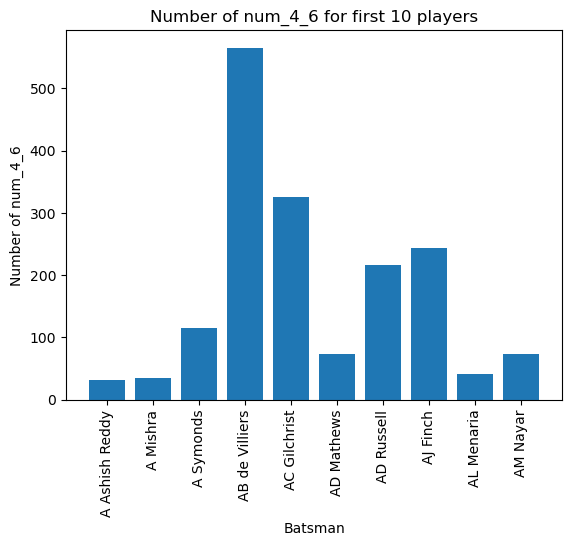

In [104]:
import matplotlib.pyplot as plt

# Select the first 10 players from the dataframe
first_10 = boundries.iloc[:10]

# Create a bar chart of the number of num_4_6 for the first 10 players
plt.bar(first_10['batsman'], first_10['num_4_6'])

# Set the title and axis labels
plt.title('Number of num_4_6 for first 10 players')
plt.xlabel('Batsman')
plt.ylabel('Number of num_4_6')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [105]:
first_10

,batsman,num_4_6
0,A Ashish Reddy,31
1,A Mishra,35
2,A Symonds,115
3,AB de Villiers,565
4,AC Gilchrist,326
5,AD Mathews,73
6,AD Russell,217
7,AJ Finch,243
8,AL Menaria,41
9,AM Nayar,74
